# Search and Rescue Operations Forecasting and Optimization (M.S. Thesis Defense, January 2019)

<i>The following notebook contains the brief and script for the M.S. Operations Research thesis defense.  This presentation is unclassified.  The work in this project was subsequently converted into two peer-reviewed journal articles that have been accepted for publication.  Additionally, this work garnered the Dean's Award for top departmental masters thesis.</i>

## Introduction

Good afternoon thesis committee and attendees, thank you for attending my defense.  I am Captain Zachary Hornberger and I will be defending my thesis on search and rescue operations forecasting and optimization.

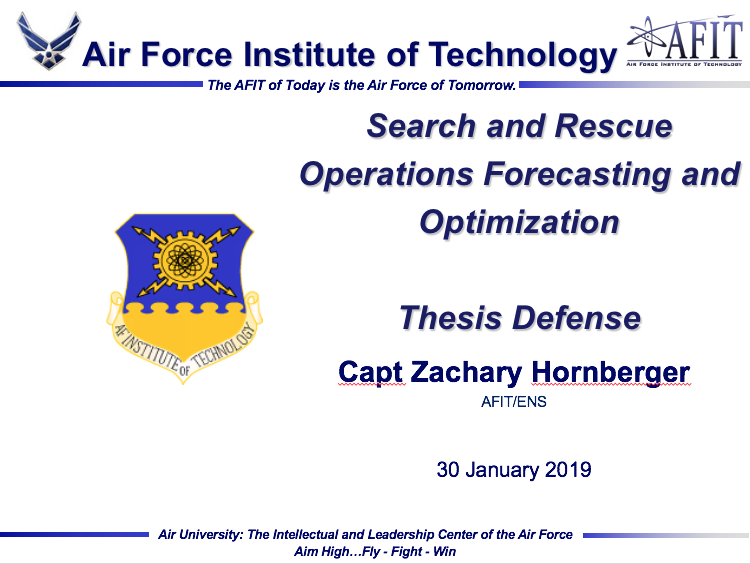

## Background

The United States Coast Guard is a vital agency within the Department of Homeland Security.  The Coast Guard is comprised of two regions - Atlantic and Pacific - which are further compartmentalized into Districts.  Each district in the Coast Guard is charged with the exectuion of the agency's 11 statutory missions, which include search and rescue, law enforcement, and marine environmental protection.  This thesis was focused on analyzing the search and rescue operations of District 14, headquartered in Honolulu, Hawai'i and responsible for Coast Guard operations across the Pacific Ocean.  Despite this district having the largest area of responsibility, it also has among the fewest assets with which to carry out its mission.  As asuch, it is imperative for the district to be strategically postured in an optimal fashion to ensure it provides the best coverage for the region.

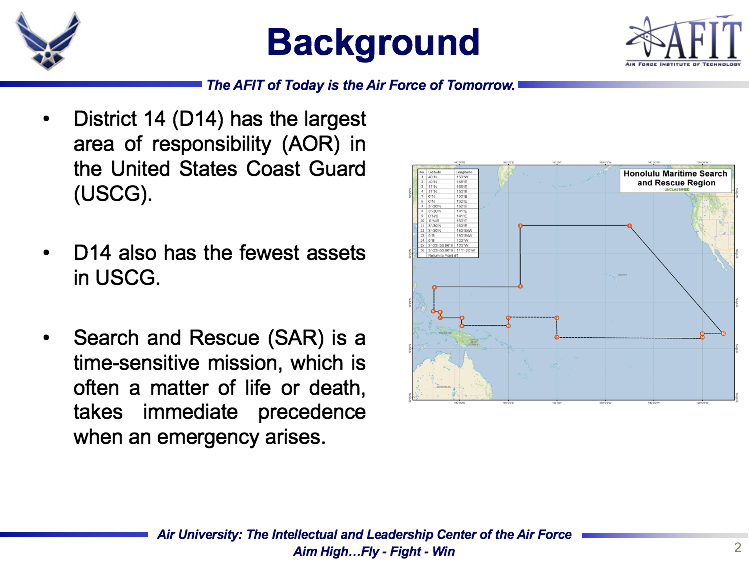

Working with the Coast Guard Research and Development Center, we evaluated historical records from District 14 to gain insights regarding the optimal allocation of district boats, cutters, and aircraft in relation to rescue operations.  Scoping this charge, we decomposed the problem into three distinct research questions:

1. We considered external variables such as tourism rates, cruise ship activity, and weather patterns to assess whether we could establish a relationship between these factors and observed emergencies.
2. We developed a probabilistic model to forecast the general location and frequency of future search and rescue operations.
3. We constructed a series of location models to evaluate the effectiveness of different asset postures under a variety of scenarios.

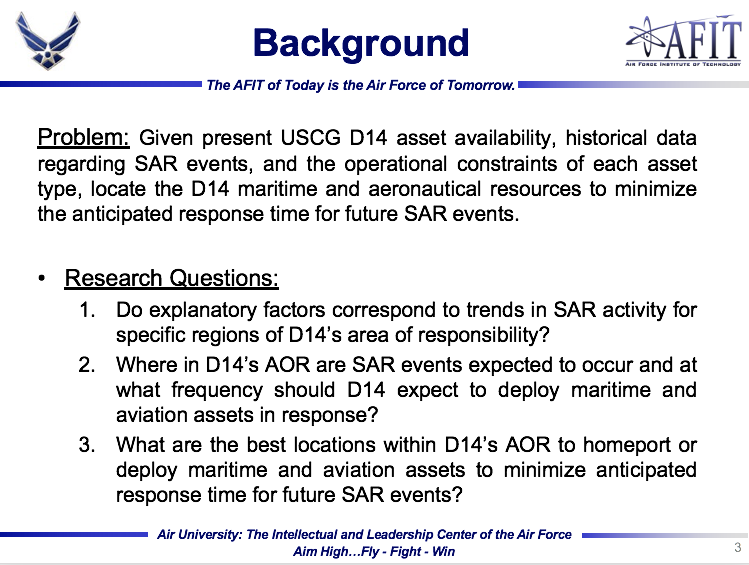

## Literature Review

Prior to outlining our techniques for solving these research questions, we first conducted a literature review.  While a number of articles were considered for each area of research, the four articles presented proved to be the foundation on which we developed our methodology.  Specifically, Azofra's Zonal Distribution Model served as the foundation for determining the location or our demand nodes and we largely adopted Razi's implementation of defining the zones of operations.  Afshartous's and Karatas's research, on the other hand, demonstrated how rescue events can be simulated probabilistically to model inherent uncertainty.

While the research we reviewed was vital to establishing our foundation, we noted an absence of certain characteristics which defined our efforts.  Namely, no previous efforts were reviewed which simultaneously considered multiple asset types, such as boats, cutters, helicopters, and fixed-wing aircraft.  While Razi considers the different mission times devoted to different types of emergencies, most studies assumed events were responded to with a single asset and none implemented a probabilistic modelling of response packages.  Lastly, we found no research which combined the relative ease in aggregation afforded by the Zonal Distribution Model with the stochastic representation of emerging demand.  It was in these research gaps that we devoted our efforts.

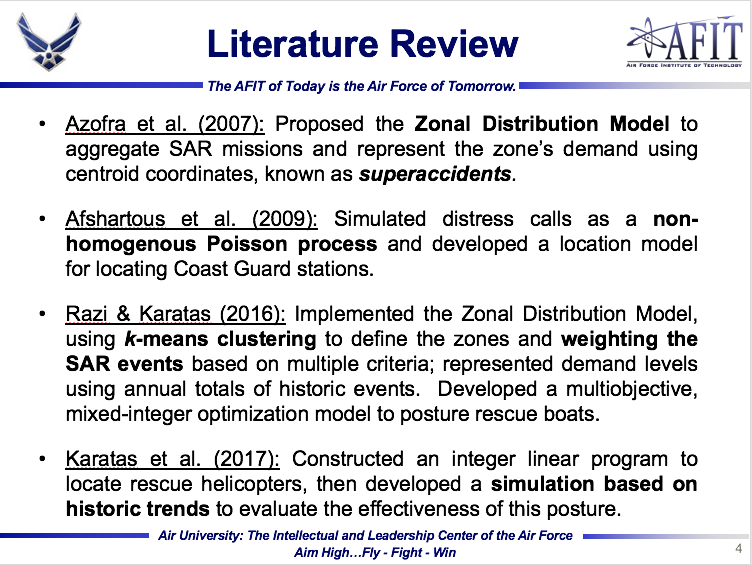

## Overview

Having determined how we wished to focus our research, we developed the following outline to guide the thesis.  As with any data-based study, we began by familiarizing ourselves with and cleaning the data.  We then implemented a k-means custering technique to aggregate the historic data into distinct zones.  For these zones, we considered our three research questions.  The first research question was solved by leveraging time series methods and linear regression analysis.  For the second question, we improved upon Azofra's work, which we call the Stochastic Zonal Distribution Model.  The last question was solved using mixed-integer location models and multi-objective optimization analysis.

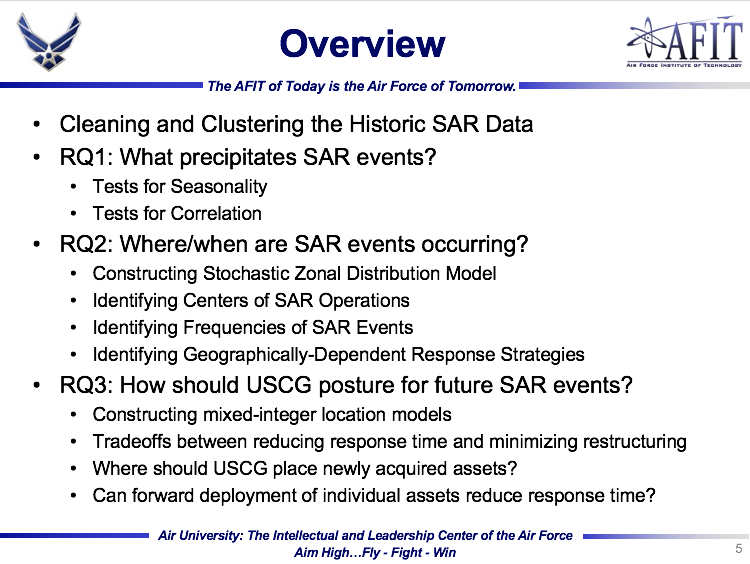

## Cleaning the Data

The Coast Guard Research and Development Center provided us with a data set of 4,315 cases from the USCG Marine Information for Safety and Law Enforcement (MISLE) database.  These MISLE records included the date, location, incident subtype, and a listing of the assets utilized in the operations.

To clean the data, we removed all medical consultation (MEDICO) events from consideration.  In these instances, a person in distress requests medical consultation over the phone and no resources are dispatched.

We also reviewed the GPS coordinates for the cases.  Any cases that were missing GPS data were removed from consideration.  We identified and corrected the GPS data for 97 events, where it was determined the GPS values were likely correct but the hemisphese designator of East or West was inaccurate.  Any cases that occurred outside the Unites States are of responsibility for search and rescue operations were removed from consideration.

After these actions, we retained approximately 92% of the original dataset for further analysis.

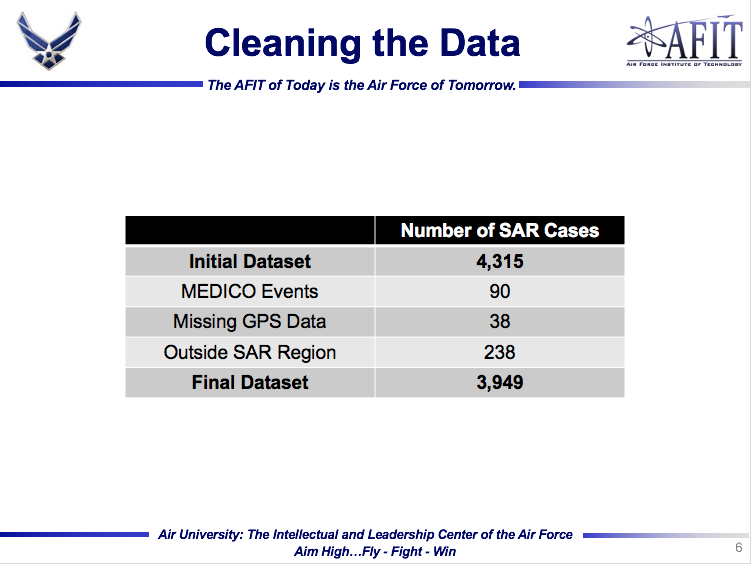

## Clustering the Data

While inspired by Razi's use of k-means clustering to define the zones of resuce operations, we sought to expand upon this implementation using a unique hierarchical clustering approach.  We classified historic records based upon the type of assets that can respond and then by the team within District 14 that coordinated the response.  These classifications yielded four mutually exclusive groups which were subsequently clusted using a k-means++ technique.  This method groups data points into clusters in such a fashion that reduces the variability between clustered points.

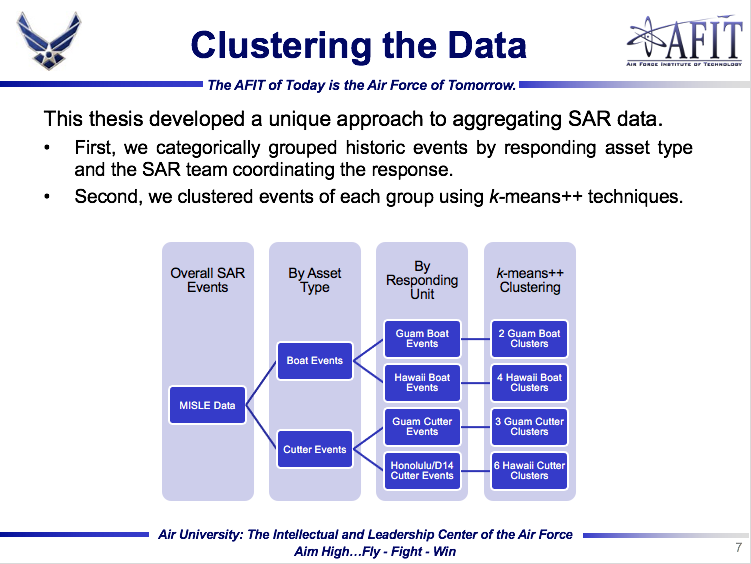

On the previous slide, I mentioned that we categorized events based on asset type.  During early discussions with District 14, it was explained that events were generally responded to using a combination or boats & helicopters or a combination of cutters & fixed-wing aircraft.  While this is a simplification of the operational planning process, we adopted this assumption for our research.  Specifically, we characterized cases as either boat-events or cutter-events based on the mission redius of boats.

Coast Guard boats are able to operate within 50 nautical miles of the shoreline of an island on which the Coast Guard has established a boat station.  For District 14, that includes the islands of Kaua'i, O'ahu, Maui, and Guam.  The 50 nautical mile boundary around these islands was approximated by first drawing a series of red rings, each with a radius of 50 nautical miles, centered on the extreme points of a landmass using Google Earth.  We then drew a larger, circuler boundary, centered on the island and encompassing as much of the red rings as possible without include too much of the area beyond these rings.  The specific information for each of these approximated boundaries is shown on the slide.

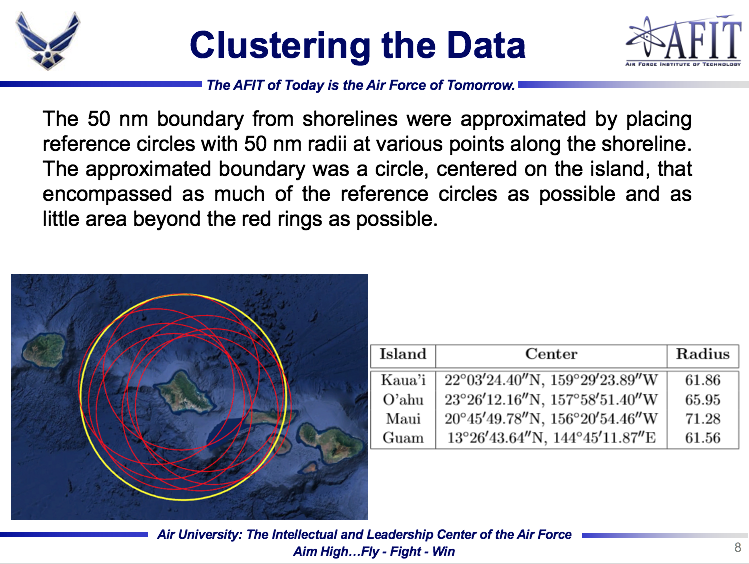

The hierarchical clustering approach yielded a total of 15 clusters, informed by the use of elbow curves and visual assessments of clustering patterns.  Once the historic data points were clustered, approximate zones were sketched in Google Earth in a manner that filled the district's area of responsibility for rescue operations and clearly delineated the different zones.  The visual depiction of these zones is presented on the slide.

Of the 15 zones, there were 2 Guam boat zones, 3 Guam cutter zones, 4 Hawaii boat zones, and 6 Hawaii cutter zones.

Having aggregated the nearly 4,000 data points into 15 manageable groupings, we proceeded to solve the three research questions.

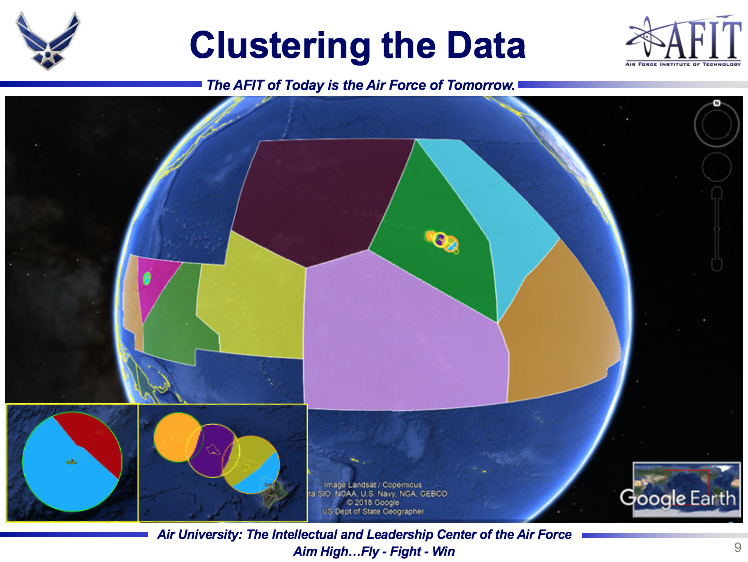

## Research Question 1

The first research question considered the relatinship between the rate of search and rescue emergencies and a variety of factors external to the Coast Guard.  The hypothesis was that a correlation between a collection of these factors and the rescue rates exist such that the district could predict changes in future operational rates based on changes to these factors.

The factors that were ultimately used for this analysis were the tourism rates to each of the main Hawaiian Islands, cruise ship activities, and weather patterns for Oahu.  Due to the availability of information and the relatively high level of rescue activity within the boat clusters surrounding Hawaii, the collected factors were isolated to the Hawaiian Islands.

We also considered seasonality across all data sets. For the external factors, seasonality was notably present.  In general, tourism levels generally spiked in the summer and dipped in the winter.  Conversely, cruise ship activity dropped in the summer and increased in the winter.  The weather data also showed clear distinctions between the rainy season and dry season for Oahu.

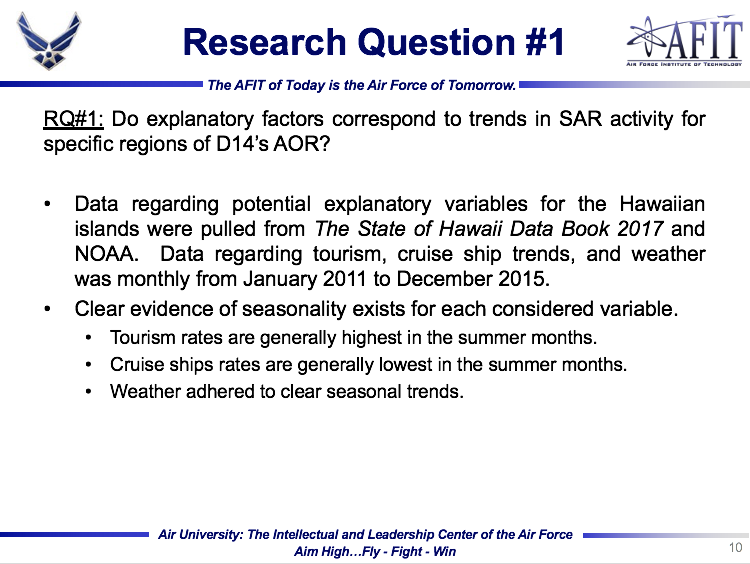

To test for seasonality within the zones, we conducted autocorrelation analysis and plotted the time-series data.  The chart on the slide displays the number of search and rescue operations compared to the month in which they occurred, for each cluster.  The colored dots represent individual months, the lines are visual trends charted using the Smoother application in JMP, and the colors correspond to the 15 zones.

For all zones but one, we observe that despite occassional fluctations, the overall trend for rescue activity remains relatively constant.  This supports the conclusion that there are minimal fluctuations corresponding with the time of the year.

For the more active zone, designated Hawaii-4 and containing the area surrounding the island of O'ahu, there is a notable seasonal spike in activity during the summer months, particularly the month of July.

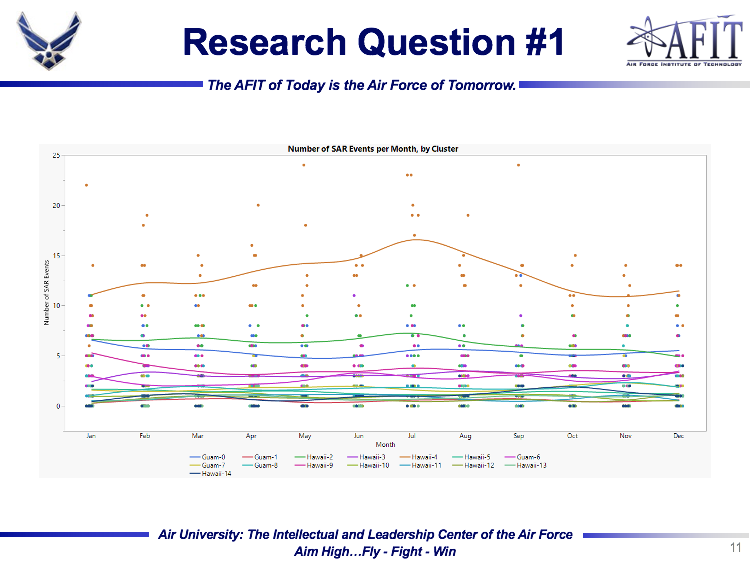

Based on our seasonality findings, we did not anticipate there to be a significant relationship between tourism, cruise ship activity, precipitation levels, and the historic rescue trends for most zones.  All attempts to successfully construct linear regression models using these factors confirmed this finding, with the exception of the zone Hawaii-4.

We isolated the summer months of Hawaii-4 - that is, June, July, and August - and identified a statistically significant relationship between the tourism rates to the island of O'ahu and the levels of rescue activity.  Specifically, we found that the linear relationship between increases in O'ahu tourism and increases in rescue activity accounted for approximately half of the variation in search and rescue operation levels during these months.

It is important to note that the data for 2015 is not included in this model.  We noted a drop for all summer rescue activity in the year 2015 and searched news reports to better understand any anomalous conditions during that year.  A press release for the National Oceanic and Atmospheric Association revealed that there were a record number of storms across the Pacific Ocean during that summer.  We hypothesized that these storms deterred nautical activity in the region, which in turn reduced the number of people performing activities that placed them at risk.

Since we removed the 2015 data from this model, it is constructed based on 12 data points.  Therefore, we suggest that further data be collected and the model be reevaluated in the future.

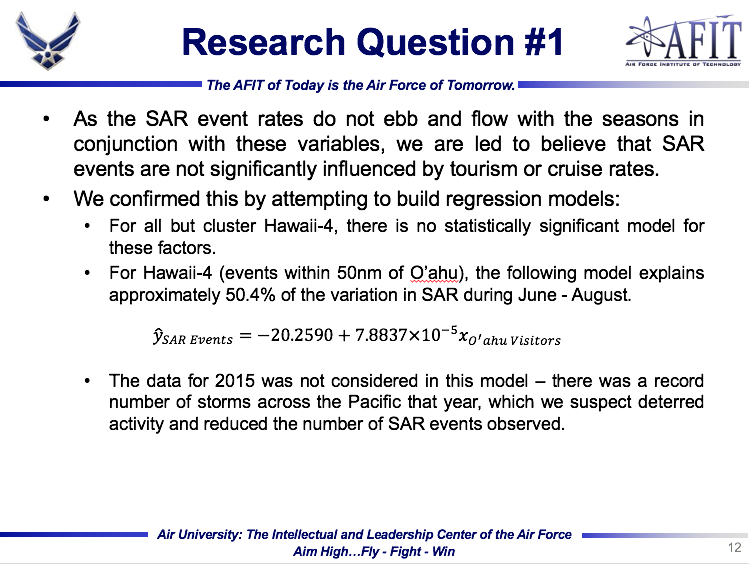

## Research Question 2

The second research question considered the frequency and location of SAR operations as well as the associated deployment of maritime and aviation assets.  To consider this, we borrowed upon aspects of previous research to develop a novel modelling technique for solving this problem.  Our proposed Stochastic Zonal Distribution Model is comprised of three distinct parts:

1. The data points are aggregated into zones and a weighted centroid is identified for each zone.  This follows the works of Azofra and Razi.  In our case, the zones previously identified by k-means++ clustering were maintained for this model.
2. The frequency of emergencies is represented using a probability distribution.  This provides fr a stochastic element that is present within the simulation-based works of Afshartous and Karatas, while maintaining the previously discussed zonal techniques.
3. The volume and frequency of maritime and aviation asset utilization are simulated based on historic trends in response strategies and empirically-developed probability distributions.  This component of the model was not observed in reviewed research and is, to the best of our knowledge, a new contribution to this field of research.

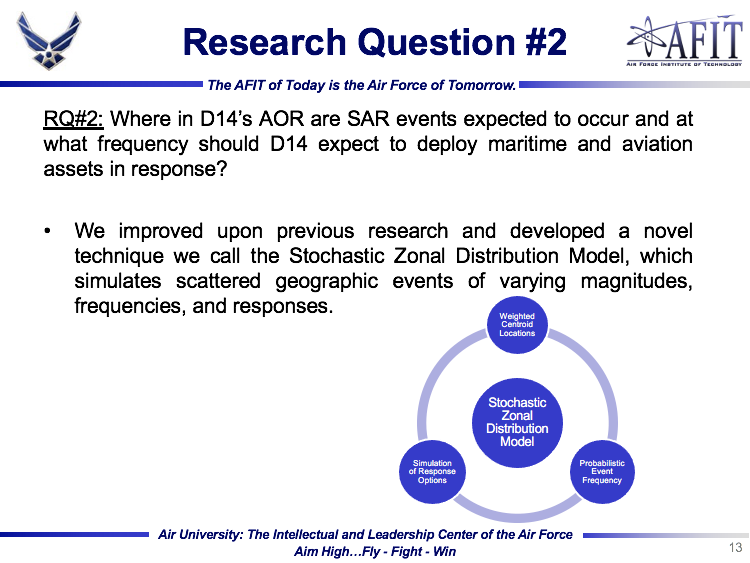

When the original Zonal Distribution Model was proposed by Azofra, the centroid of each zone, referred to as the <i>superaccident site</i>, was computed as a pure average of the latitudes and longitudes for each event.  In the chart displayed on this slide for the zone Hawaii-10, this pure or unweighted centroid is represented by the golf circle.

Razi applied this same technique, but added a mechanism by which to assign each incident with a different weight.  The resulting superaccident sites were then computed as weighted averages of the latitudes and longitudes of the events.  We have chosen to adopt this technique as well.

For our research, the weight of each event was determined by the number of activities associated with the event's MISLE case file.  Activities are a method of documentation that is used within the MISLE database, with each event having an initial activity when the case is opened and additional activities for each asset dispatched.  We elected to consider the weighting of events based on the volume of assets deployed because the central question of our research is focused on understanding where, when, and how many maritime and aviation assets are utilized.  Using this information, a weighted superaccident site was computed.  This is represented by the red circle on the presented plot.

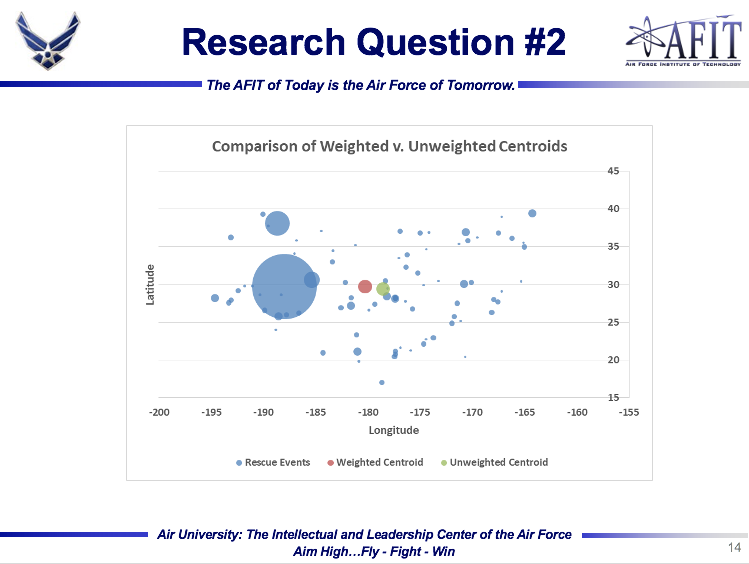

When fitting probability distributions to the historic frequency data, the Distributions application in JMP was utilized.  Based on previous research using simulation approaches to model emergency data, we anticipated that a Poisson distribution would be the most appropriate for this problem.  Search and rescue events can be represented as a counting process, are independent in nature, and the autocorrelation analysis suggested that this rate of emergence was relatively stationary.  Due to the mild fluctuations observed in the time-series analysis, however, a strict Poisson distribution was not found to be the most appropriate distribution for all the zones.  Instead, 13 of the 15 zonal workloads were modelled using a Gamma-Poisson Distribution.

A Gamma-Poisson Distribution is utilized for poisson processes whose rates fluctuate according to a Gamma distribution.  The derivation for this probability mass function is shown on the slide presented.  Instead of estimating a single rate parameter as with the Poisson distribution, the Gamma-Poisson requires two parameters - alpha and beta - to be approximated.

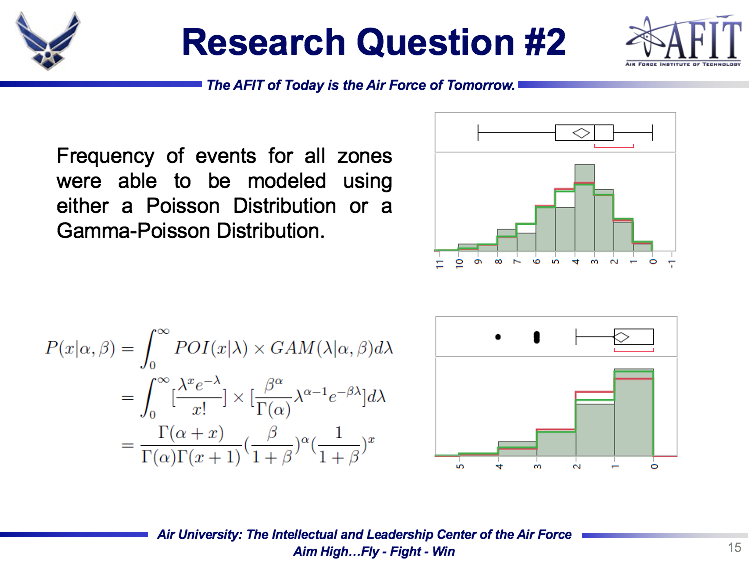

The results of the distribution fitting are presented on this table shown.  For the zones Hawaii-2 and Hawaii-13, the Poisson distribution was found to be appropriate.  For the rest of the zones, the Gamma-Poisson Distribution was more advantageous.  This is indicated by the corresponding p-values from the Pearson's Chi Square Goodness of Fit tests, wherein larger p-values are indicative of better fits.

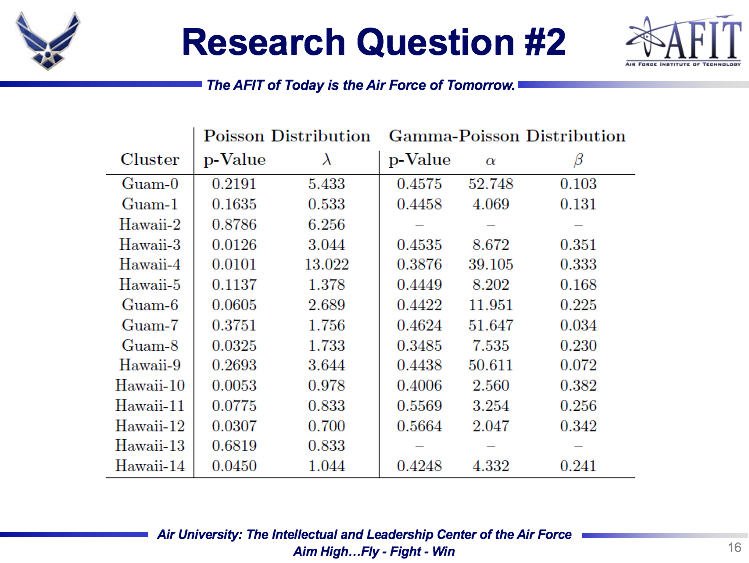

The last component of the Stochastic Zonal Distribution Model is the simulation of different response strategies.  When the Coast Guard receives notification of an emerging crisis, the search and rescue team utlilizes a system known as SAROPS to consider the best approach given the weather, asset availability, and case details.  While this level of fidelity was beyond the scope of this thesis, we did seek to understand the underlying trends in rescue response packages as they relate to the geography of rescue operations.

Reviewing the records of specific assets utilized in operations, we identified three general strategies for response: Maritime Only, Aeronautical Only, and a combination of Maritime and Aeronautical Assets.  Each of these general strategies broke down into multiple levels of response volume.  We capped the response volume at 4 maritime assets and 2 aeronautical assets due to the number of current assets belonging to the district.

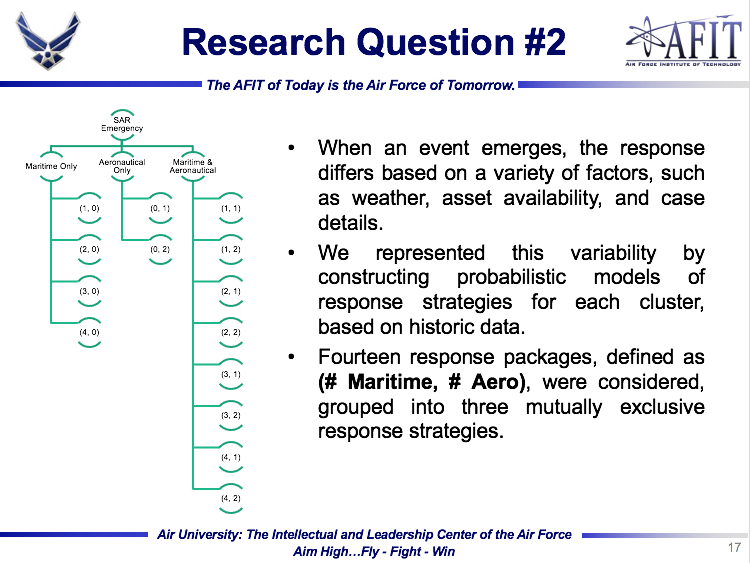

Presented in this table is the summer of response strategies.  For each zone, the probability of every individual response strategy is displayed.  For instance, we found that when an emergency occurred in zone Guam-0, there was about an 8% probability that 0 boats and 1 helicopter would be dispatched, about 0.2% probability that 0 boats and 2 helicopters would be dispatched, and so on.

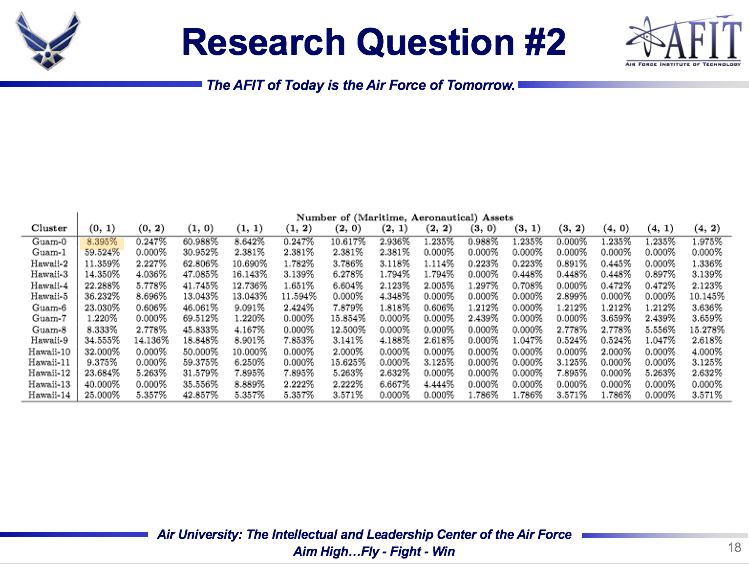

Having quantified the relative frequencies of events and probabilities of various responses in each zone, we combined this information into a two-tier Monte Carlo simulation which provided the output of total number of maritime and aviation assets dispatched to each zone per month.

In the first tier of the simulation, a random pull from the event probability distributions was drawn, representing the number of events for the simulated month.  The second tier of the simulation entailed, for each of the events from tier 1, a random draw from the empirically-developed pmfs from the previous slide.  For example, if the first tier of our simulation output that there were 5 events in a given zone for the simulated month, then the second tier would replicate the response of 5 separate events.  The simulation concluded each month by totalling the number of maritime assets and the number of aviation assets separately.

For each of the 15 zones, this Monte Carlo was used to simulate 10,000 months of operations.

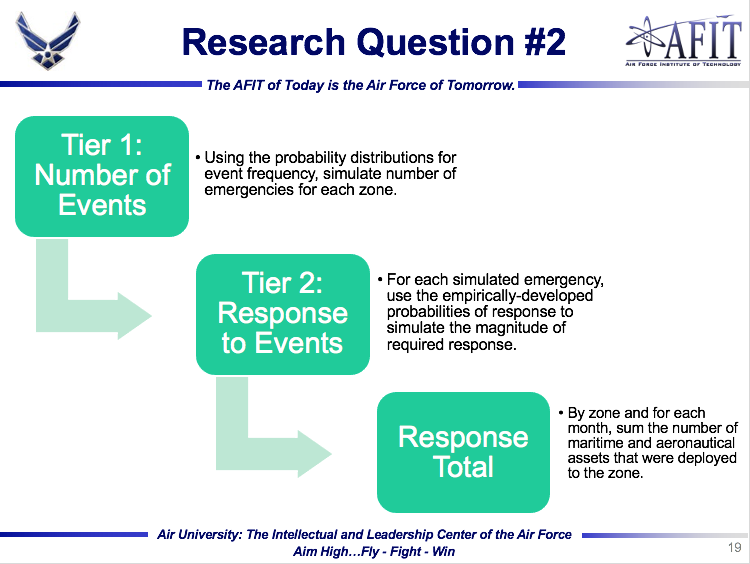

Presented on this slide are the results of the Monte Carlo simulation for the boat-event zones.  For each zone, we have information regarding the number of search and rescue events each month, the number of maritime assets dispatched, and the number of aviation assets dispatched.

A summary of the 10,000 simulated months is also provided, broken out by percentiles.  For interpretation purposes, let's consider zone Guam-0.  This shows that the fewest emergencies ever observed in a simulated month was 0 events.  For 25% of the months, or 2,500 months, there were 4 or fewer events.  The median number of events per month was 5.  For 75% of the months, there were 7 or fewer events and the most events ever observed in a single month was 18.

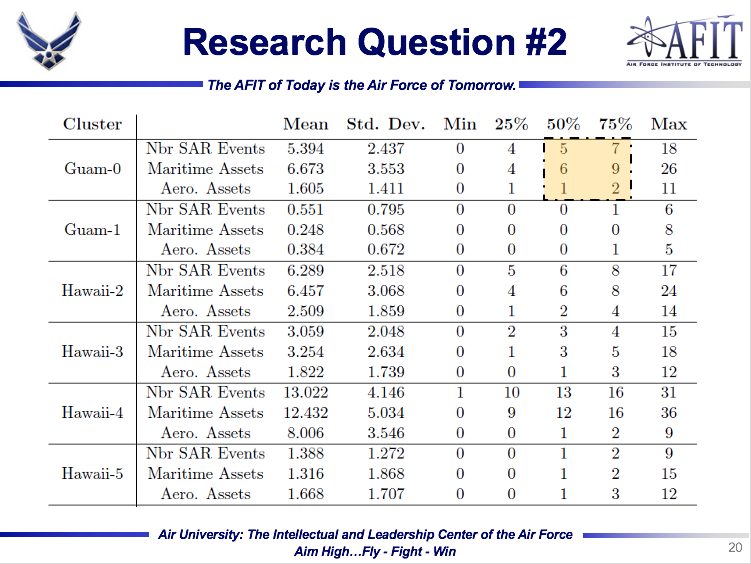

The same information is now shown for the cutter-event zones.

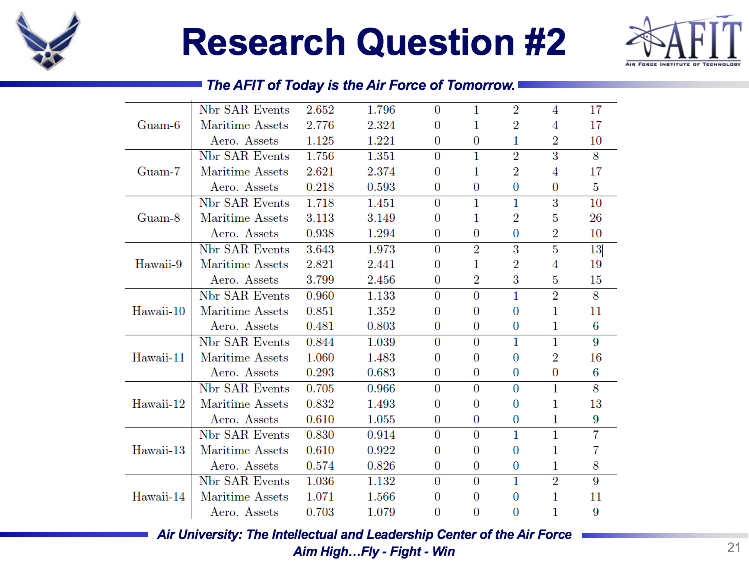

## Research Question 3

The last research question was focused on utilizing the results thus far to optimize the strategic posture of the district assets with the primary objective of reducing overall expected response time.  To accomplish this, we first clearly outlined additional assumptions we were making specifically as they related to these location problems.

To avoid attempting to quantify the value of life or distinguish between the value of life vs. value of property, we decided to utilize the time required to move an asset along the shortest path possible from its assigned homeport to the superaccident site as a representation for the cost associated with responding.  Whenever the model dispatches an asset to respond to an emergency, it computed the time to respond using the asset's maximum speed.  Conversely, whenever the model relocates an asset to a new station, it computed the time to relocate using the asset's cruise speed.

To draw a distinct line between this research and a scheduling problem, the model assumes that assets are able to respond to multiple SAR events per month and that SAR events do not overlap in time.

As previously discussed, different zones were categorized as either boat-clusters or cutter-clusters.  To represent the operational limits of the different classes of assets, boats and rotary wing aircraft are assumed to respond to all boat-cluster events while cutters and fixed wing aircraft respond to all cutter-cluster events.

On the following slides, I will present each of the location problems we considered and the associated mixed-integer formulations.  For each of these location models, we defined the rescue operation demand based on the 50th percentile of demand from the Monte Carlo simulation to represented a typical month, the 75th percentile of demand to simulate heightened volumes of activity, and then evaluated the abilities for optimal configurations of one demand level to respond to different demand levels as a means of evaluating robustness.

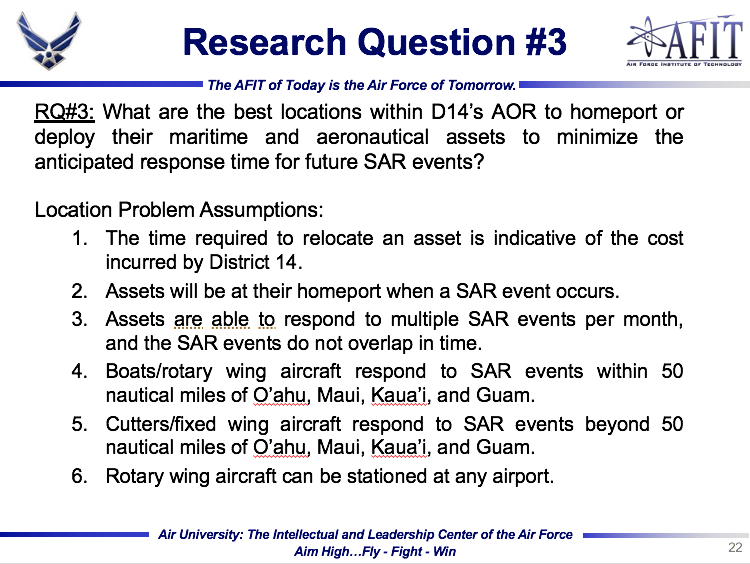

The first location model considered the tradeoff between minimizing the cost associated with relocating assets to new stations and minimizing the cost associated with responding to emerging events.  The graphic provided illustrates this concept.

All assets are assigned to the available homeports.  This listing of candidate locations spans about 50 harbors and airports across the Pacific region.  All assets, once assigned to homeports, are then dispatched to respond to the rescue demand for each of the 15 zones.

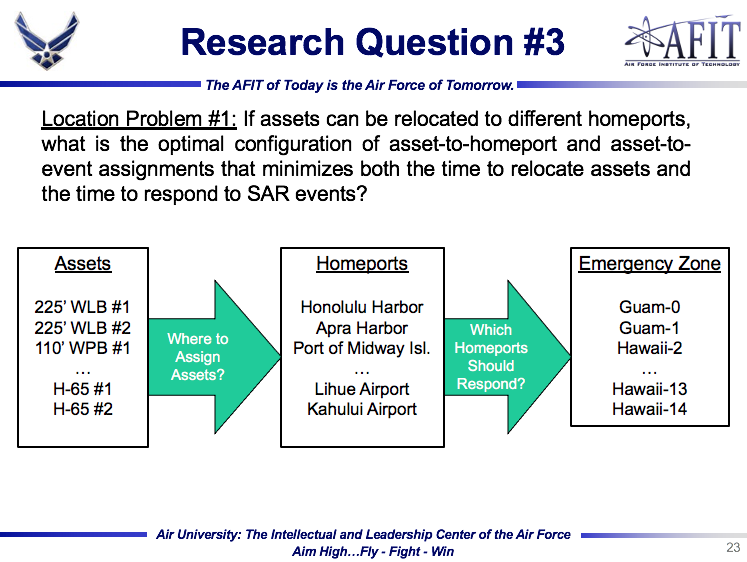

Presented is the formulation that was utilized to solve this location problem.

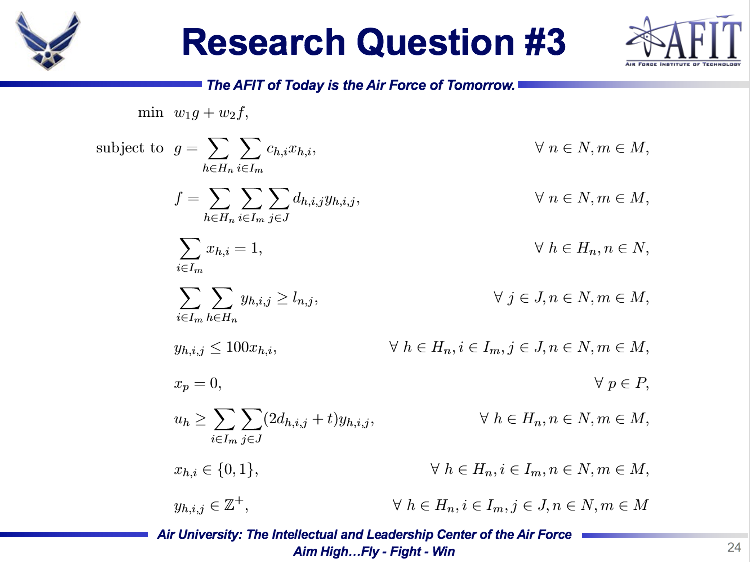

Brief descriptions of each equation in this model are displayed on the slide.  I will discuss a couple components of this model in particular.  The objective function in this problem is to minimize the weighted combination of both the total time to relocate assets and the total time to respond to events.

The sixth equation states that the number of times an asset, assigned to station <i>i</i> is dispatched to respond to emergencies in zone <i>j</i> has to be less than or equal to the binary decision of whether to assign the asset to station <i>i</i> in the first place, times an arbitrarily large number, which in this instance is 100.  This prevents assets from being dispatched by stations that the asset does not belong to.

The seventh equation prevents erroneous assignments, such as stationing a cutter or boat at an airport or an aircraft at a harbor.  These assignments are predefined in the set <i>P</i>, for which the decision variable <i>x</i> is indexed on in this case.

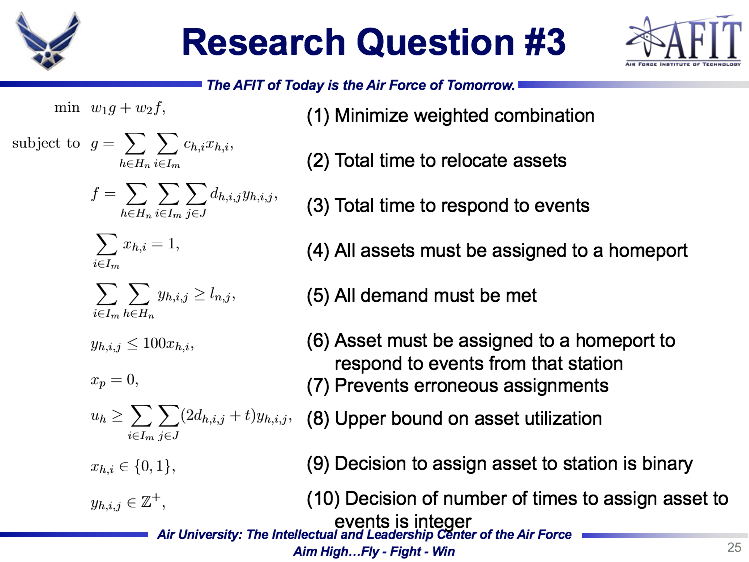

The second location model considered the impact that a newly acquired asset would have on the response capabilities of the district.  In this scenario, the only candidate homeports are those currently operated by the district.  All assets currently owned by the district remain stationed at their current homeport and once the new asset is placed at a homeport, that all assets are considered in the response to SAR emergencies.

We adjusted the specifications of the new asset between runs of the model depending on the new asset we wished to notionally add to the fleet, and then compared the results from these runs.

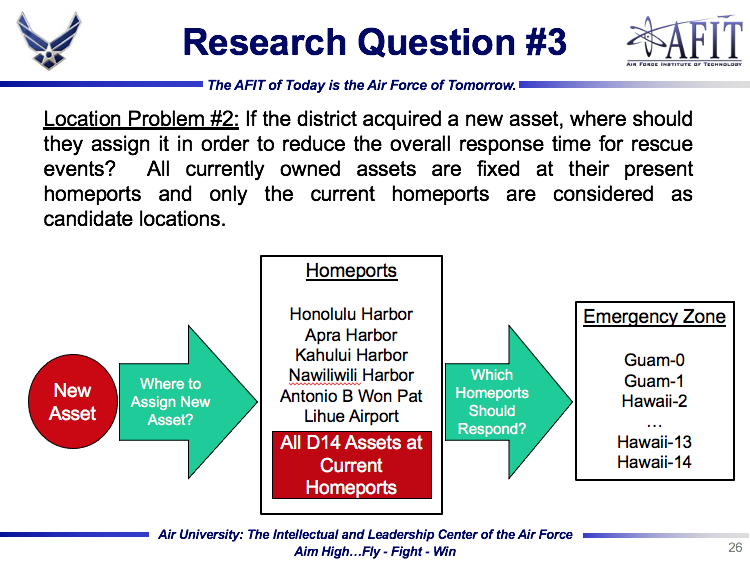

The third location problem uses the same model as the second but differs in the sets that the formulation pulls from.  In this scenario, a single asset that the district currently owns is released from their current homeport to forward deploy to any harbor on airport across the Pacific.  All other assets that are not being considered for deployment remain at their current homeports and once the deployed asset is positioned, then all assets are considered in the response to SAR emergencies.

We adjusted the deployed asset between runs of the model depending on the scenario we wished to consider, and then compared the results from these runs.

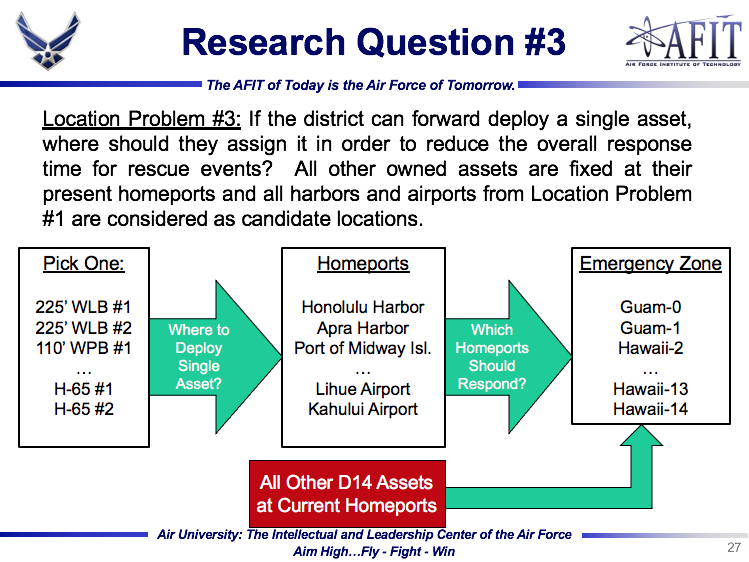

Presented is the formulation used to solve location problems 2 and 3.  Note that this is very similar to the fomulation used for the first location problem, with two differences.

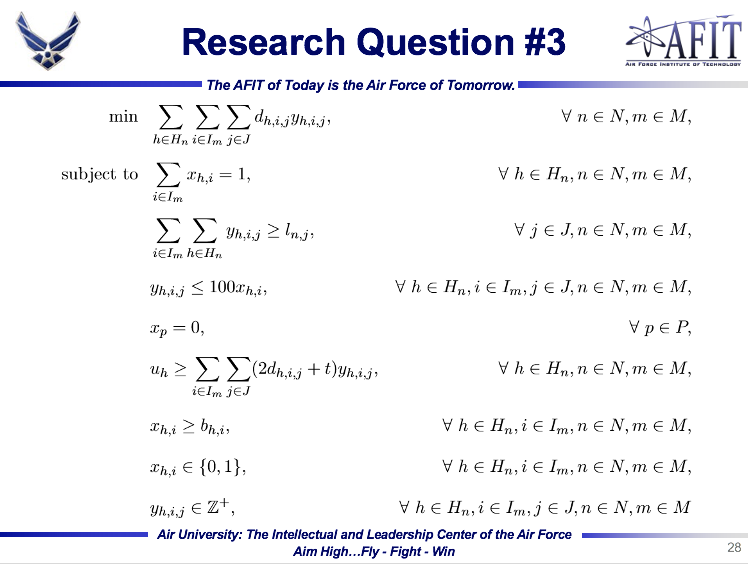

First, the objective function is updated to reflect only the minimization of the total response time to emergencies.

Second, a constraint is added that forces all assets to remain at their current homeport unless they are authorized to move.

The crux of this formulation for both the second and third location problems comes from the definition of each set.  For example, the set of candidate homeports $H_n$ for the second location problem is limited to a list of harbors and airports that the district currently operates out of, whereas this set is expanded to include approximately 50 airports and harbors for the third problem.  Similitary, the parameter $b_{(h, i)}$, which delineates between which assets can move and which assets must stay at their current homeport, is manually updated according to the desired scenario.

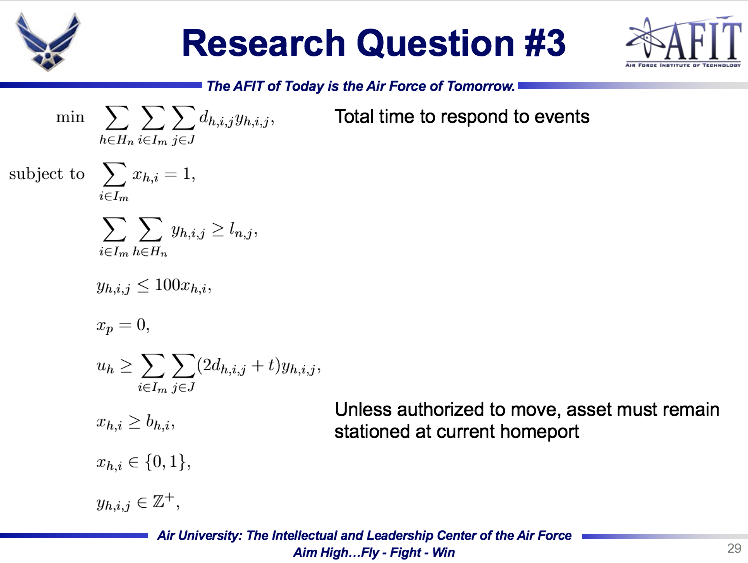

Presented are some of the key results from these location problems.

Location Problem 1 illustrated the significance of the Fast Response Cutter and the 110 Ft Cutter to the search and rescue mission.  Among the multiple trends that were observed as the weighting on the objectives was adjusted, there was a persistent movement of an FRC to the big island of Hawai'i.

Location Problem 2 showed that an additional Fast Response Cutter could have the greatest impact on reducing the response time to emergencies.  When there are relatively high levels of activity in zone Hawaii-12, thich is the Hawaii zone closest to Guam, an additional 100 Ft Cutter or 87 Ft Cutter stationed at Apra Harbor can respond to this workload and cause a trickle-down effect across the rest of the AOR.

Location Problem 3 suggested that the ideal forward deployment was maneuvering a 110 Ft Cutter away from Apra Harbor and further into Sector Guam's response region.

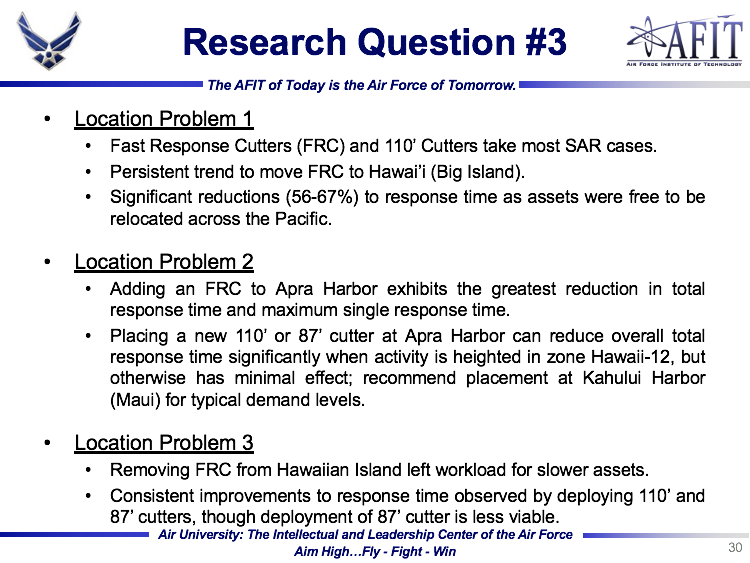

## Conclusions

Having address our three research questions, we consolidated our findings into a list of recommendations for District 14.

1. Anticipate annual surges in rescue operations off the coast of O'ahu during the summer months, particularly in July.  Consider tourism rates as a metric to predict this level of surge.
2. Consider opening a Coast Guard station on the big island of Hawai'i, either in the form of a boat station near Kona or a cutter station in Hilo.
3. Attempt to acquire a new Fast Response Cutter and station it at Apra Harbor.
4. Consider forward-deploying a 110 Ft Cutter to or fostering partnerships with rescue teams in the Federated States of Micronesia.

We also found that optimal configurations at heightened levels of demand generally performed better at the typical demand levels than the optimal configurations at typtical demand levels performed when the demand was elevated.

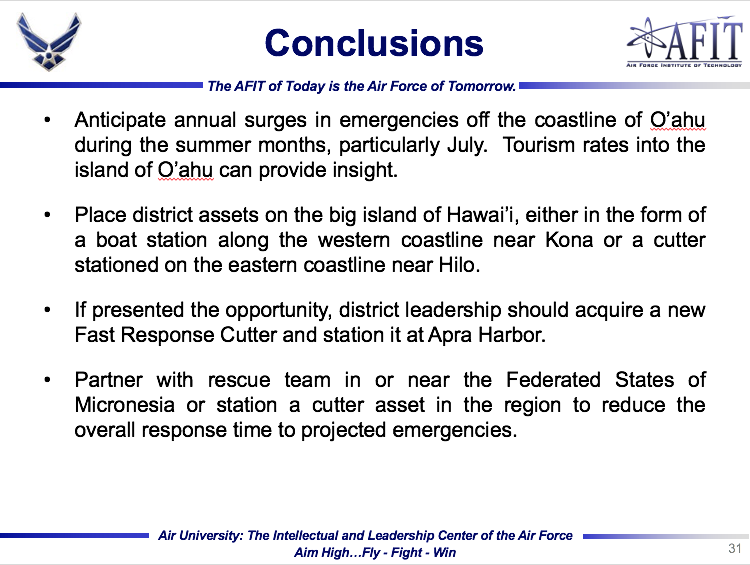

## Contributions

To the best of our knowledge, this thesis makes the following contributions to the field of research.

1. We implemented a hierarchical clustering based on assets used, response team, and the location of the events.
2. We improved upon the work of Azofra to develop the stochastic zonal distribution model.  In this model, we were able to quantify the response strategies with varying probabilities for each zone and consider both maritime and aviation assets.
3. We used this forecasted information to construct a mixed-integer location model that considered the placement of multiple asset classes and evaluated the effectiveness of forward-deployment on reducing response time to emergencies.

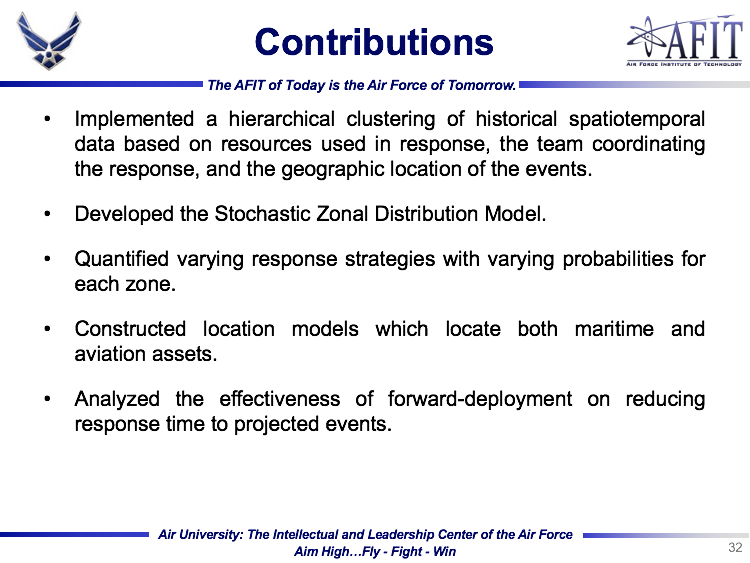

## Future Research

While we were able to study a number of components within this research, there were still aspects that we would consider for future research.  

1. This thesis did not differentiate between incident subtypes, though we speculate that multivariate techniques can be used to predict different types of emergencies.
2. Having proposed the Stochastic Zonal Distribution Model, we believe that future research can test the limitations of this approach and quantify its effectiveness compared to other spatiotemporal forecasting methods.
3. During discussions with Coast Guard personnel, the cumbersome nature of MISLE data was frequently discussed.  We believe that text-mining methods could be utilized to synthesize case notes and identify underlying trends inherent within these operations that are otherwise missed due to the sheer volume of information.

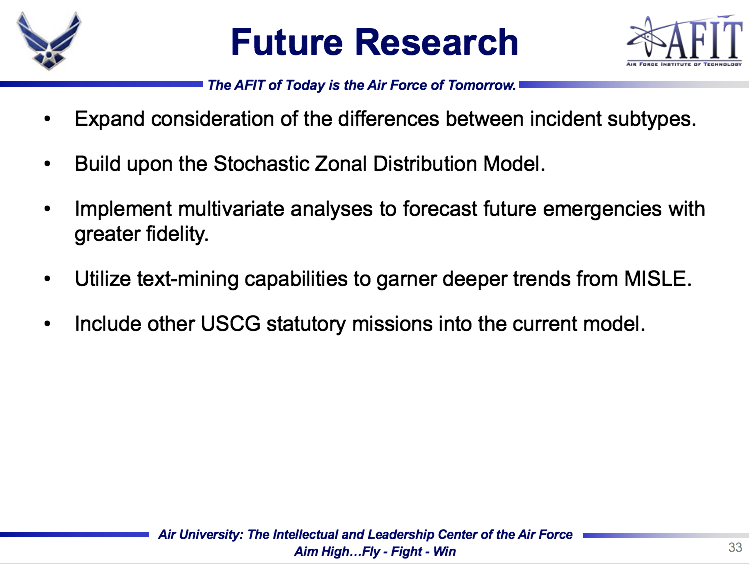

## References

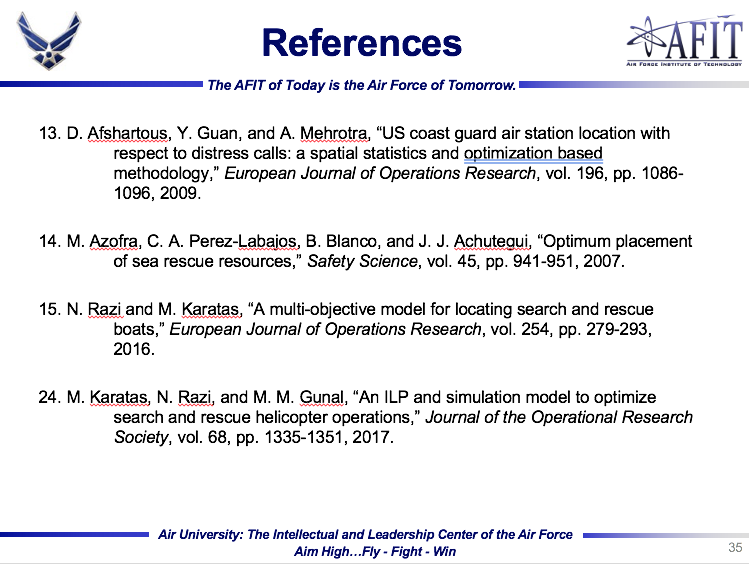